In [73]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import sqlite3 as sql
import seaborn as sns

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

print("Python Version:", sys.version, '\n')
print("Numpy Version: ", np.__version__)

Python Version: 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ] 

Numpy Version:  1.20.1


In [74]:

# You can loading data from excel also
df_test = pd.read_csv('test_data.csv') 
df_train= pd.read_csv('train_data.csv') 

In [75]:
df_test.head() 

,y,x1,x2
0,585.419191,1997,1
1,269.365326,1988,3
2,317.658704,1989,4
3,400.653320,1986,11
4,444.240501,1987,12


In [76]:
df_train.head() 

,y,x1,x2
0,737.721966,1994,17
1,372.012721,1987,11
2,298.244694,1990,4
3,353.815829,1991,5
4,899.943226,1998,15


In [77]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       140 non-null    float64
 1   x1      140 non-null    int64  
 2   x2      140 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.4 KB


In [78]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       60 non-null     float64
 1   x1      60 non-null     int64  
 2   x2      60 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.5 KB


<AxesSubplot:>

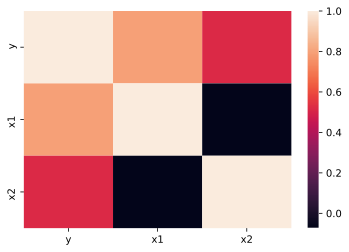

In [79]:
sns.heatmap(df_test.corr())

<AxesSubplot:>

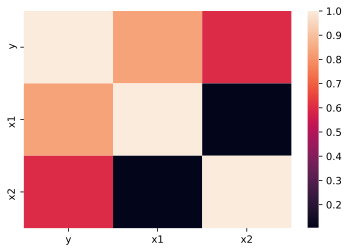

In [80]:
sns.heatmap(df_train.corr())

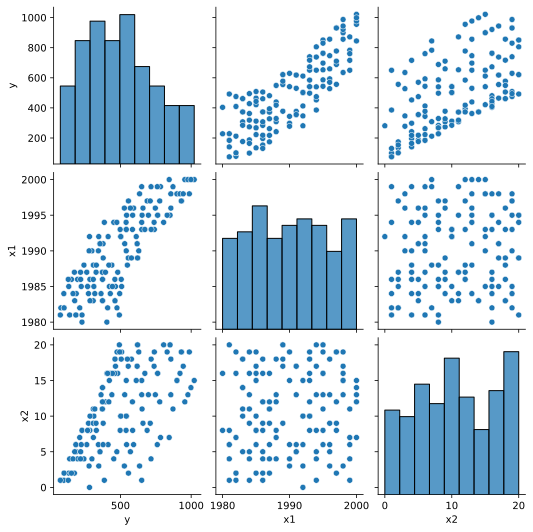

In [81]:
sns.pairplot(df_train)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df_train[['x1', 'x2']]
y = df_train['y']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

In [87]:
lm.fit(X_train,y_train)

LinearRegression()

In [88]:
# print the intercept
print(lm.intercept_)

-66996.14286991007


In [89]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
x1,33.793125
x2,22.406319


In [90]:
predictions = lm.predict(X_test)

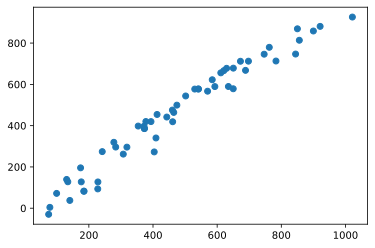

In [91]:
plt.scatter(y_test,predictions)

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


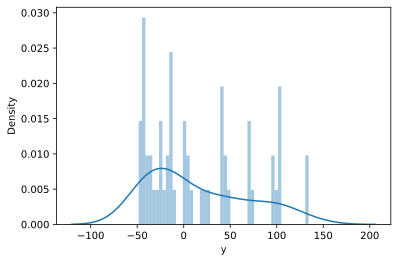

In [92]:
sns.distplot((y_test-predictions),bins=50);

In [93]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 44.014176752718306
MSE: 3051.329357216884
RMSE: 55.23883920953521


In [95]:
X = df_train[['x2']]
y = df_train['y']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [97]:
lm = LinearRegression()

In [98]:
lm.fit(X_train,y_train)

LinearRegression()

In [99]:
# print the intercept
print(lm.intercept_)

240.11151551295592


In [100]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
x2,24.562963


In [101]:
predictions = lm.predict(X_test)

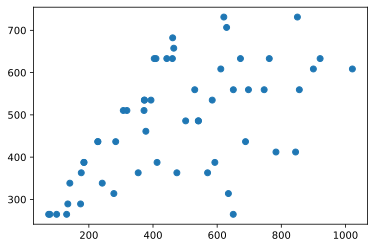

In [102]:
plt.scatter(y_test,predictions)

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 168.91223698794235
MSE: 38371.295636379604
RMSE: 195.88592505940696


In [104]:
X = df_train[['x1']]
y = df_train['y']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [106]:
lm = LinearRegression()

In [107]:
lm.fit(X_train,y_train)

LinearRegression()

In [108]:
print(lm.intercept_)

-70063.26669052073


In [109]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
x1,35.460093


In [110]:
predictions = lm.predict(X_test)

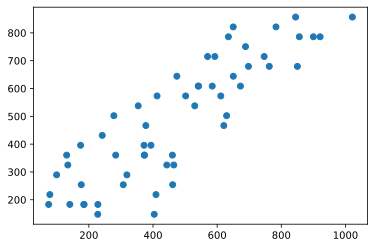

In [111]:
plt.scatter(y_test,predictions)

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 101.50316172380352
MSE: 15317.443233418395
RMSE: 123.7636587751768


In [113]:
# x2 selected
# MAE: 168.91223698794235       
# MSE: 38371.295636379604
# RMSE: 195.88592505940696

# x1 selected 
# MAE: 101.50316172380352
# MSE: 15317.443233418395
# RMSE: 123.7636587751768

## orig without deletion
# MAE: 44.014176752718306
# MSE: 3051.329357216884
# RMSE: 55.23883920953521